In [348]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [349]:
import torch
import torchvision
from torchvision import datasets, transforms

import torch.nn as nn
import torch.optim as optim
import copy


# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to range [-1, 1]
])

# Download the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
# Download the testset
testset = datasets.MNIST('~/.pytorch/MNIST_data', train=False,
                                       download=True, transform=transform)

In [350]:
indices = list(range(len(trainset)))
np.random.shuffle(indices)
shuffled_trainset = torch.utils.data.Subset(trainset, indices)
print(len(shuffled_trainset))

60000


In [351]:
'''dataset1 = []
dataset2 = []
dataset3 = []
dataset4 = []
dataset5 = []
dataset6 = []

for i in range(10000):
    dataset1 = torch.utils.data.Subset(full_dataset, list(range(10000)))
    dataset1.append(shuffled_trainset[i])
    
for i in range(10000, 20000):
    
    dataset2.append(shuffled_trainset[i])
    
for i in range(20000, 30000):
    
    dataset3.append(shuffled_trainset[i])
    
for i in range(30000, 40000):
    
    dataset4.append(shuffled_trainset[i])
    
for i in range(40000, 50000):
    
    dataset5.append(shuffled_trainset[i])
for i in range(50000, 60000):
    
    dataset6.append(shuffled_trainset[i])'''
    
dataset1 = torch.utils.data.Subset(shuffled_trainset, list(range(10000)))
dataset2 = torch.utils.data.Subset(shuffled_trainset, list(range(10000, 20000)))
dataset3 = torch.utils.data.Subset(shuffled_trainset, list(range(20000, 30000)))
dataset4 = torch.utils.data.Subset(shuffled_trainset, list(range(30000, 40000)))
dataset5 = torch.utils.data.Subset(shuffled_trainset, list(range(40000, 50000)))
dataset6 = torch.utils.data.Subset(shuffled_trainset, list(range(50000, 60000)))

In [352]:
batch_size=64
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)
trainloader = torch.utils.data.DataLoader(shuffled_trainset, batch_size=batch_size,
                                         shuffle=False)

In [353]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(npimg)
    plt.show()


In [354]:
from torchvision.transforms import v2

def apply_perspective_transform(image):


    mean = torch.mean(image)
    std = torch.std(image)

    perspective_transform = v2.Compose([
        v2.RandomPerspective(distortion_scale=0.3, p=1.0, fill=-1),
        v2.ToDtype(torch.float32, scale=True),
        #v2.Normalize(mean=[mean], std=[std]),
    ])

    transformed_image = perspective_transform(image)
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image

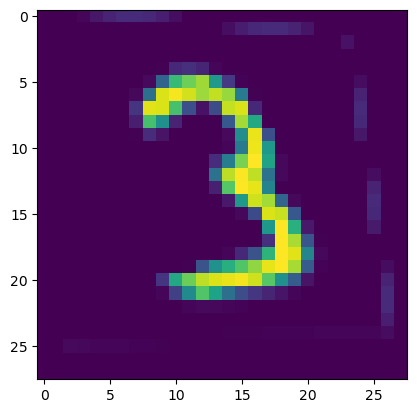

In [355]:
out = apply_perspective_transform(dataset1[0][0])
imshow(out)

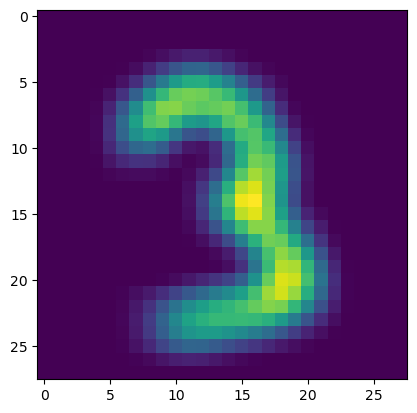

In [356]:
def apply_blur(image):


    blurrer = v2.GaussianBlur(kernel_size=5, sigma=(1, 2.))

    transformed_image = blurrer(image)
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image


out = apply_blur(dataset1[0][0])


imshow(out)

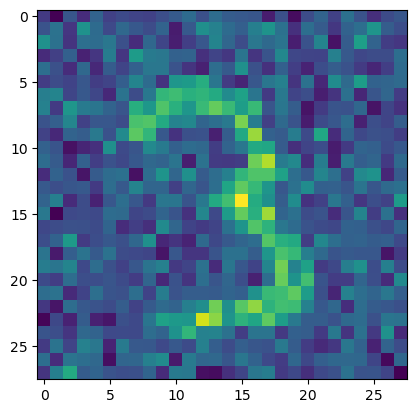

In [357]:
def apply_gaussian_noise(image):

    noise = np.random.normal(scale=0.5,size=(28,28))

    transformed_image = image + noise
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image

out = apply_gaussian_noise(dataset1[0][0])


imshow(out)

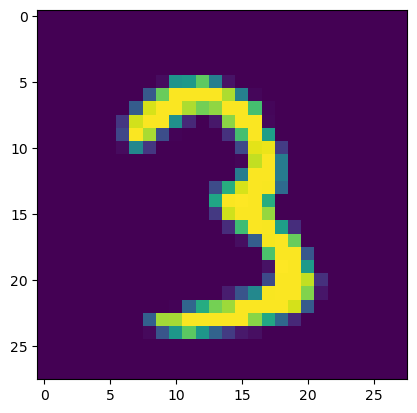

In [358]:
def apply_random_erase(image):


    erase = v2.RandomErasing(value=-1)

    transformed_image = erase(image)
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image

out = apply_random_erase(dataset1[0][0])


imshow(out)

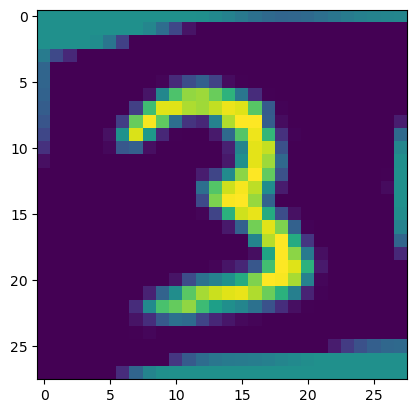

In [359]:
def apply_elastic_transform(image):
    elastic_transformer = v2.ElasticTransform(alpha=50.0)
    transformed_image = elastic_transformer(image)
    transformed_image = transformed_image.reshape(28, 28)
    return transformed_image

out = apply_elastic_transform(dataset1[0][0])
imshow(out)

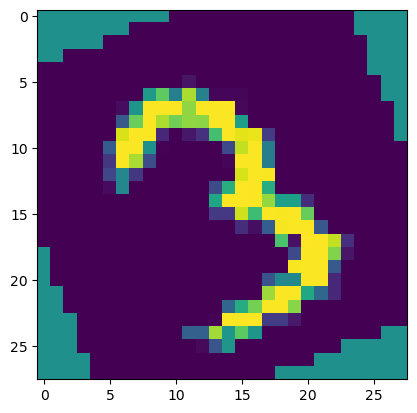

In [360]:
def apply_random_rotation(image):
    rotater = v2.RandomRotation(degrees=(0, 30))
    transformed_image = rotater(image)
    transformed_image = transformed_image.reshape(28, 28)
    return transformed_image

out = apply_random_rotation(dataset1[0][0])
imshow(out)

In [361]:
'''print(len(dataset1))
train_1 = []
for i in range(10000):
    train_1.append([apply_perspective_transform(dataset1[i][0]), dataset1[i][1]])
print(len(train_1))
train_2 = []
for i in range(10000):
    train_2.append(apply_blur(dataset2[i][0]))
train_3 = []
for i in range(10000):
    train_3.append(apply_gaussian_noise(dataset3[i][0]))
train_4 = []
for i in range(10000):
    train_4.append(apply_random_erase(dataset4[i][0]))
train_5 = []
for i in range(10000):
    train_5.append(apply_elastic_transform(dataset5[i][0]))
train_6 = []
for i in range(10000):
    train_6.append(apply_random_rotation(dataset6[i][0]))'''

for i in range(10000):
    dataset1[i][0] == apply_perspective_transform(dataset1[i][0])
for i in range(10000):
    dataset2[i][0] == apply_blur(dataset2[i][0])
for i in range(10000):
    dataset3[i][0] == apply_gaussian_noise(dataset3[i][0])
for i in range(10000):
    dataset4[i][0] == apply_random_erase(dataset4[i][0])
for i in range(10000):
    dataset5[i][0] == apply_elastic_transform(dataset5[i][0])
for i in range(10000):
    dataset6[i][0] == apply_random_rotation(dataset6[i][0])

In [362]:
batch_size=64
trainloaders = []
train_loader_1 = torch.utils.data.DataLoader(dataset1, batch_size=batch_size, shuffle=False)
train_loader_2 = torch.utils.data.DataLoader(dataset2, batch_size=batch_size, shuffle=False)
train_loader_3 = torch.utils.data.DataLoader(dataset3, batch_size=batch_size, shuffle=False)
train_loader_4 = torch.utils.data.DataLoader(dataset4, batch_size=batch_size, shuffle=False)
train_loader_5 = torch.utils.data.DataLoader(dataset5, batch_size=batch_size, shuffle=False)
train_loader_6 = torch.utils.data.DataLoader(dataset6, batch_size=batch_size, shuffle=False)
trainloaders.append(trainloader)
trainloaders.append(train_loader_1)
trainloaders.append(train_loader_2)
trainloaders.append(train_loader_3)
trainloaders.append(train_loader_4)
trainloaders.append(train_loader_5)
trainloaders.append(train_loader_6)

In [363]:
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 2, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(2, 4, kernel_size=3, stride=1, padding=1)
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(4 * 7 * 7, 16)
        self.fc2 = nn.Linear(16, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.max_pool(self.relu(self.conv1(x)))
        x = self.max_pool(self.relu(self.conv2(x)))
        x = x.view(-1, 4 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    

def generate_models():

    models = []
    model = CustomCNN()
    model1 = CustomCNN()
    model2 = CustomCNN()
    model3 = CustomCNN()
    model4 = CustomCNN()
    model5 = CustomCNN()
    model6 = CustomCNN()

    models.append(model)
    models.append(model1)
    models.append(model2)
    models.append(model3)
    models.append(model4)
    models.append(model5)
    models.append(model6)

    return models

In [364]:
initial_rand_parms = copy.deepcopy(model.state_dict())


In [365]:
criterion = nn.CrossEntropyLoss()
optimizers = []
optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)
optimizer3 = optim.Adam(model3.parameters(), lr=0.001)
optimizer4 = optim.Adam(model4.parameters(), lr=0.001)
optimizer5 = optim.Adam(model5.parameters(), lr=0.001)
optimizer6 = optim.Adam(model6.parameters(), lr=0.001)
optimizers.append(optimizer)
optimizers.append(optimizer1)
optimizers.append(optimizer2)
optimizers.append(optimizer3)
optimizers.append(optimizer4)
optimizers.append(optimizer5)
optimizers.append(optimizer6)

In [366]:
num_epochs = 1
from tqdm import tqdm

for j in tqdm(range(7)):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloaders[j], 0):
            #print(len(data))
            inputs, labels = data
            
            optimizers[j].zero_grad()
            
            outputs = models[j](inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizers[j].step()
            
            running_loss += loss.item()
            if i % 100 == 99:  # print every 200 mini-batches
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(trainloaders[j])}], Loss: {running_loss / 200:.4f}')
                running_loss = 0.0
    
print('Finished Training')

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0132
Epoch [1/1], Step [200/938], Loss: 0.4333
Epoch [1/1], Step [300/938], Loss: 0.2626
Epoch [1/1], Step [400/938], Loss: 0.2167
Epoch [1/1], Step [500/938], Loss: 0.1863
Epoch [1/1], Step [600/938], Loss: 0.1707
Epoch [1/1], Step [700/938], Loss: 0.1453
Epoch [1/1], Step [800/938], Loss: 0.1417
Epoch [1/1], Step [900/938], Loss: 0.1306


 14%|█▍        | 1/7 [00:05<00:31,  5.19s/it]

Epoch [1/1], Step [100/157], Loss: 1.0317


 29%|██▊       | 2/7 [00:06<00:13,  2.71s/it]

Epoch [1/1], Step [100/157], Loss: 1.0516


 43%|████▎     | 3/7 [00:07<00:07,  1.88s/it]

Epoch [1/1], Step [100/157], Loss: 1.1181


 57%|█████▋    | 4/7 [00:09<00:05,  2.00s/it]

Epoch [1/1], Step [100/157], Loss: 0.9935


 71%|███████▏  | 5/7 [00:11<00:04,  2.20s/it]

Epoch [1/1], Step [100/157], Loss: 1.0368


 86%|████████▌ | 6/7 [00:14<00:02,  2.32s/it]

Epoch [1/1], Step [100/157], Loss: 1.0514


100%|██████████| 7/7 [00:17<00:00,  2.43s/it]

Finished Training


In [367]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

Accuracy of the network on the 10000 test images: 93.10%


In [368]:
# state_dict = model.state_dict()
# for param_tensor in state_dict:
#     print(f"{param_tensor}:\n {state_dict[param_tensor].numpy()}\n")
    
# filters = state_dict["conv2.weight"]
# extracted = []
# for i in range(filters.shape[0]):
#     for j in range(filters.shape[1]):
        

In [369]:
'''from torch.nn import functional as F

# calculate similarity along the rows
print(extracted[0])
tensor1 = extracted[0].unsqueeze(1)
tensor2 = extracted[1].unsqueeze(1)
cosine_similarity_row = F.cosine_similarity(tensor1, tensor2, dim=2)
print(cosine_similarity_row)'''

'''# PAIRWISE SIMILARITY
from sklearn.metrics.pairwise import pairwise_distances
from torch.nn import functional as F

X = extracted[0]
Y = extracted[1]

sim = pairwise_distances(X, Y, metric='cosine')
print(sim)


Xf = extracted[0].view(-1)
Yf = extracted[1].view(-1)

simF = F.cosine_similarity(Xf, Yf, dim=0)
print(simF)'''




"# PAIRWISE SIMILARITY\nfrom sklearn.metrics.pairwise import pairwise_distances\nfrom torch.nn import functional as F\n\nX = extracted[0]\nY = extracted[1]\n\nsim = pairwise_distances(X, Y, metric='cosine')\nprint(sim)\n\n\nXf = extracted[0].view(-1)\nYf = extracted[1].view(-1)\n\nsimF = F.cosine_similarity(Xf, Yf, dim=0)\nprint(simF)"

In [370]:
def calc_overall_sim(tensor1, tensor2):
    
    tensor1_flat = tensor1.view(-1)
    tensor2_flat = tensor2.view(-1)
    
    similarity = F.cosine_similarity(tensor1_flat, tensor2_flat, dim=0)
    similarity = torch.abs(similarity)
    
    return similarity.detach().numpy().reshape(1,)[0]

In [371]:
def calc_pearson_coeff(tensor1, tensor2):
    corr_coeff = np.corrcoef(tensor1.detach().numpy().flatten(), tensor2.detach().numpy().flatten())[0,1]
    corr_coeff = np.abs(corr_coeff)
    return corr_coeff

In [372]:
def calc_frob_norm(tensor1, tensor2):
    A = tensor1.detach().numpy()
    B = tensor2.detach().numpy()
    frobenius_norm = np.linalg.norm(A - B, ord='fro')
    return frobenius_norm

In [373]:
from torch.nn import functional as F
import matplotlib.pyplot as plt
#similarity_scores = np.zeros((6,8))
similarity_scores_1 = []
similarity_scores_2 = []
similarity_scores_3 = []
similarity_scores_4 = []
similarity_scores_5 = []
similarity_scores_6 = []
similarity_scores_7 = []
similarity_scores_8 = []
similarity_scores_9 = []
similarity_scores_10 = []

for i in range(1, 7):

    cnn_filters_i = models[i].conv1.weight
    cnn_filters_i = cnn_filters_i.view(cnn_filters_i.size(0)*cnn_filters_i.size(1), cnn_filters_i.size(2), cnn_filters_i.size(3))   
    for j in range(2):

        filter1 = cnn_filters_i[j]

        for k in range(i+1, 7):
            cnn_filters_k = models[k].conv1.weight
            cnn_filters_k = cnn_filters_k.view(cnn_filters_k.size(0)*cnn_filters_k.size(1), cnn_filters_k.size(2), cnn_filters_k.size(3))
            filter2 = cnn_filters_k[j]

            #similarity = calc_overall_sim(filter1, filter2)
            #similarity = calc_pearson_coeff(filter1, filter2)
            similarity = calc_frob_norm(filter1, filter2)

            if j==0:
                similarity_scores_1.append(similarity)

            if j==1:
                similarity_scores_2.append(similarity)
        


    cnn_filters = models[i].conv2.weight
    cnn_filters = cnn_filters.view(cnn_filters.size(0)*cnn_filters.size(1), cnn_filters.size(2), cnn_filters.size(3))
    print(cnn_filters.shape)
    
    for j in range(8):
        filter1 = cnn_filters[j]
        
        for k in range(i+1, 7):  # Fix: adjust the range to avoid out-of-bounds indices
            cnn_filters2 = models[k].conv2.weight
            cnn_filters2 = cnn_filters2.view(cnn_filters2.size(0)*cnn_filters2.size(1), cnn_filters2.size(2), cnn_filters2.size(3))
            filter2 = cnn_filters2[j]
            
            #similarity = calc_overall_sim(filter1, filter2)
            #similarity = calc_pearson_coeff(filter1, filter2)
            similarity = calc_frob_norm(filter1, filter2)
            
            if j==0:
                similarity_scores_3.append(similarity)
            
            if j==1:
                similarity_scores_4.append(similarity)
            
            if j==2:
                similarity_scores_5.append(similarity)
            
            if j==3:
                similarity_scores_6.append(similarity)
            
            if j==4:
                similarity_scores_7.append(similarity)
            
            if j==5:
                similarity_scores_8.append(similarity)
            
            if j==6:
                similarity_scores_9.append(similarity)
                
            if j==7:
                similarity_scores_10.append(similarity)  







print(similarity_scores_1)
print(similarity_scores_2)
print(similarity_scores_3)
print(similarity_scores_4)
print(similarity_scores_5)
print(similarity_scores_6)
print(similarity_scores_7)
print(similarity_scores_8)
print(similarity_scores_9)
print(similarity_scores_10)



'''# Get the indices of the 3 most similar filters
most_similar_indices = similarity_scores.flatten().argsort()[-3:]

# Get the similarity scores for the 3 most similar filters
most_similar_scores = similarity_scores.flatten()[most_similar_indices]

# Plot the heatmap
plt.imshow(similarity_scores, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xlabel('Filter Index')
plt.ylabel('Model Index')
plt.title('Similarity Scores Heatmap')
plt.show()


# Calculate similarity scores between filter pairs
similarity_scores = []
for i in range(len(cnn_filters)):
    for j in range(i+1, len(cnn_filters)):
        filter1 = cnn_filters[i].detach().numpy()
        filter2 = cnn_filters[j].detach().numpy()
        similarity = np.dot(filter1.flatten(), filter2.flatten()) / (np.linalg.norm(filter1) * np.linalg.norm(filter2))
        similarity_scores.append((i, j, similarity))

# Sort similarity scores in descending order
similarity_scores.sort(key=lambda x: x[2], reverse=True)

# Select top three similar filter pairs
top_three_pairs = similarity_scores[:3]

# Plot the filters in each pair
fig, axs = plt.subplots(3, 2, figsize=(8, 12))
for i, (pair1, pair2, similarity) in enumerate(top_three_pairs):
    axs[i, 0].imshow(cnn_filters[pair1].detach().numpy(), cmap='gray')
    axs[i, 0].set_title(f'Filter {pair1+1}')
    axs[i, 1].imshow(cnn_filters[pair2].detach().numpy(), cmap='gray')
    axs[i, 1].set_title(f'Filter {pair2+1}')
    axs[i, 0].axis('off')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()'''

torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
[1.3545002, 0.9090903, 1.5280313, 0.5302245, 1.0530303, 1.4358145, 1.8196623, 1.2889103, 1.2926004, 1.2935444, 0.9619485, 1.17267, 1.4288764, 0.9284702, 0.9304027]
[1.512077, 1.5503514, 1.0909781, 1.2508634, 1.2401117, 1.3993644, 1.0676544, 1.0801412, 1.4833647, 1.50399, 1.5096928, 1.8202162, 1.419323, 1.2169302, 0.8660563]
[0.8809426, 0.6926535, 0.77758294, 0.91115874, 0.83218086, 0.8688452, 0.38209644, 1.2282418, 0.61415106, 0.8196352, 1.1543626, 1.0467026, 1.2793804, 0.6917712, 1.3625782]
[0.9431766, 1.1210299, 0.9597014, 0.4646468, 0.45922592, 1.0040706, 0.7225208, 0.6026407, 0.9799808, 0.770091, 0.9644412, 1.1295469, 0.8056886, 0.9298438, 0.65068203]
[1.1558796, 1.1836358, 1.0870339, 0.7076526, 1.0270587, 0.86837405, 0.8125933, 1.3861564, 1.0865374, 0.69340277, 1.307973, 0.80456185, 1.0787355, 0.8149564, 1.0791918]
[1.1030239, 0.7210576, 0.84549326, 0

"# Get the indices of the 3 most similar filters\nmost_similar_indices = similarity_scores.flatten().argsort()[-3:]\n\n# Get the similarity scores for the 3 most similar filters\nmost_similar_scores = similarity_scores.flatten()[most_similar_indices]\n\n# Plot the heatmap\nplt.imshow(similarity_scores, cmap='hot', interpolation='nearest')\nplt.colorbar()\nplt.xlabel('Filter Index')\nplt.ylabel('Model Index')\nplt.title('Similarity Scores Heatmap')\nplt.show()\n\n\n# Calculate similarity scores between filter pairs\nsimilarity_scores = []\nfor i in range(len(cnn_filters)):\n    for j in range(i+1, len(cnn_filters)):\n        filter1 = cnn_filters[i].detach().numpy()\n        filter2 = cnn_filters[j].detach().numpy()\n        similarity = np.dot(filter1.flatten(), filter2.flatten()) / (np.linalg.norm(filter1) * np.linalg.norm(filter2))\n        similarity_scores.append((i, j, similarity))\n\n# Sort similarity scores in descending order\nsimilarity_scores.sort(key=lambda x: x[2], reverse=

In [374]:
filters_1 = []
filters_2 = []
filters_3 = []
filters_4 = []
filters_5 = []
filters_6 = []
filters_7 = []
filters_8 = []
filters_9 = []
filters_10 = []
for i in range(1,7):
    cnn_filters = models[i].conv1.weight
    cnn_filters = cnn_filters.view(cnn_filters.size(0)*cnn_filters.size(1), cnn_filters.size(2), cnn_filters.size(3))
    for j in range(2):
        if j==0:
            filters_1.append(cnn_filters[j].detach().numpy())
        if j==1:
            filters_2.append(cnn_filters[j].detach().numpy())
    cnn_filters = models[i].conv2.weight
    cnn_filters = cnn_filters.view(cnn_filters.size(0)*cnn_filters.size(1), cnn_filters.size(2), cnn_filters.size(3))

    for j in range(8):
        if j==0:
            filters_3.append(cnn_filters[j].detach().numpy())
        if j==1:
            filters_4.append(cnn_filters[j].detach().numpy())
        if j==2:
            filters_5.append(cnn_filters[j].detach().numpy())
        if j==3:
            filters_6.append(cnn_filters[j].detach().numpy())
        if j==4:
            filters_7.append(cnn_filters[j].detach().numpy())
        if j==5:
            filters_8.append(cnn_filters[j].detach().numpy())
        if j==6:
            filters_9.append(cnn_filters[j].detach().numpy())  
        if j==7:   
            filters_10.append(cnn_filters[j].detach().numpy())
            
matrices = np.array(filters_1)
variance_matrix = np.var(matrices, axis=0)   
print(variance_matrix)

[[0.07248388 0.03404978 0.03567695]
 [0.11386786 0.07135532 0.08676661]
 [0.02859618 0.0888718  0.10260931]]


In [375]:
print(similarity_scores_1)
print(similarity_scores_2)
print(similarity_scores_3)
print(similarity_scores_4)
print(similarity_scores_5)
print(similarity_scores_6)
print(similarity_scores_7)
print(similarity_scores_8)
print(similarity_scores_9)
print(similarity_scores_10)

filter1_idx = np.argmax(similarity_scores_1)
filter2_idx = np.argmax(similarity_scores_2)
filter3_idx = np.argmax(similarity_scores_3)
filter4_idx = np.argmax(similarity_scores_4)
filter5_idx = np.argmax(similarity_scores_5)
filter6_idx = np.argmax(similarity_scores_6)
filter7_idx = np.argmax(similarity_scores_7)
filter8_idx = np.argmax(similarity_scores_8)
filter9_idx = np.argmax(similarity_scores_9)
filter10_idx = np.argmax(similarity_scores_10)

indexes = [filter1_idx, filter2_idx, filter3_idx, filter4_idx, filter5_idx, filter6_idx, filter7_idx, filter8_idx, filter9_idx, filter10_idx]


print("Filter 1 index:", filter1_idx)
print("Filter 2 index:", filter2_idx)
print("Filter 3 index:", filter3_idx)
print("Filter 4 index:", filter4_idx)
print("Filter 5 index:", filter5_idx)
print("Filter 6 index:", filter6_idx)
print("Filter 7 index:", filter7_idx)
print("Filter 8 index:", filter8_idx)
print("Filter 9 index:", filter9_idx)
print("Filter 10 index:", filter10_idx)



#(1,2) (1,3) (1,4) (1,5) (1,6) (2,3) (2,4) (2,5) (2,6)  (3,4) (3,5) (3,6) (4,5) (4,6) (5,6)


#with torch.no_grad():
 #   net.conv1.weight[1][1] = torch.zeros((3, 3))

[1.3545002, 0.9090903, 1.5280313, 0.5302245, 1.0530303, 1.4358145, 1.8196623, 1.2889103, 1.2926004, 1.2935444, 0.9619485, 1.17267, 1.4288764, 0.9284702, 0.9304027]
[1.512077, 1.5503514, 1.0909781, 1.2508634, 1.2401117, 1.3993644, 1.0676544, 1.0801412, 1.4833647, 1.50399, 1.5096928, 1.8202162, 1.419323, 1.2169302, 0.8660563]
[0.8809426, 0.6926535, 0.77758294, 0.91115874, 0.83218086, 0.8688452, 0.38209644, 1.2282418, 0.61415106, 0.8196352, 1.1543626, 1.0467026, 1.2793804, 0.6917712, 1.3625782]
[0.9431766, 1.1210299, 0.9597014, 0.4646468, 0.45922592, 1.0040706, 0.7225208, 0.6026407, 0.9799808, 0.770091, 0.9644412, 1.1295469, 0.8056886, 0.9298438, 0.65068203]
[1.1558796, 1.1836358, 1.0870339, 0.7076526, 1.0270587, 0.86837405, 0.8125933, 1.3861564, 1.0865374, 0.69340277, 1.307973, 0.80456185, 1.0787355, 0.8149564, 1.0791918]
[1.1030239, 0.7210576, 0.84549326, 0.8004143, 0.768507, 0.7434788, 0.42965356, 0.73136854, 0.72892356, 0.6001804, 0.37061557, 0.72061265, 0.49884653, 0.62652, 0.7576858

In [376]:
# Hand coding in the filters

selected_filters = []

for i, idx in enumerate(indexes):
    if idx in range(0,5):
        if i == 0 or i == 1:
            selected_filters.append(model1.conv1.weight[i])
        else:
            selected_filters.append(model1.conv2.weight[(i//2)-1][i%2])

    if idx in range(5,9):
        if i == 0 or i == 1:
            selected_filters.append(model2.conv1.weight[i])
        else:
            selected_filters.append(model2.conv2.weight[(i//2)-1][i%2])
    if idx in range(9,12):
        if i == 0 or i == 1:
            selected_filters.append(model3.conv1.weight[i])
        else:
            selected_filters.append(model3.conv2.weight[(i//2)-1][i%2])
    if idx in range(12,14):
        if i == 0 or i == 1:
            selected_filters.append(model4.conv1.weight[i])
        else:
            selected_filters.append(model4.conv2.weight[(i//2)-1][i%2])
    if idx in range(14,15):
        if i == 0 or i == 1:
            selected_filters.append(model5.conv1.weight[i])
        else:
            selected_filters.append(model5.conv2.weight[(i//2)-1][i%2])
    
        
        


In [377]:
# Warm starting a model with the selected filters
from torchsummary import summary

print(len(selected_filters))

print(selected_filters[0].type)

model_warm_start = CustomCNN()
summary(model_warm_start, (1, 28,28))

with torch.no_grad():
    model_warm_start.conv1.weight[0] = selected_filters[0]
    model_warm_start.conv1.weight[1] = selected_filters[1]
    model_warm_start.conv2.weight[0][0] = selected_filters[2]
    model_warm_start.conv2.weight[0][1] = selected_filters[3]
    model_warm_start.conv2.weight[1][0] = selected_filters[4]
    model_warm_start.conv2.weight[1][1] = selected_filters[5]
    model_warm_start.conv2.weight[2][0] = selected_filters[6]
    model_warm_start.conv2.weight[2][1] = selected_filters[7]
    model_warm_start.conv2.weight[3][0] = selected_filters[8]
    model_warm_start.conv2.weight[3][1] = selected_filters[9]

model_warm_start.requires_grad = True
torch.enable_grad
print(model_warm_start.conv1.weight)
print(model_warm_start.conv2.weight)

10
<built-in method type of Tensor object at 0x7f23ed354ef0>
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.01
Estimated Total Si

In [378]:
print(model_warm_start.conv1.weight)
num_epochs = 1
from tqdm import tqdm
import copy
optimizer_warm= optim.Adam(model_warm_start.parameters(), lr=0.001)


initial_params = copy.deepcopy(model_warm_start.state_dict())
print(initial_params.keys())

with torch.enable_grad():

    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloaders[0], 0):
            #print(len(data))
            inputs, labels = data
            
            optimizer_warm.zero_grad()
            
            outputs = model_warm_start(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer_warm.step()
            
            running_loss += loss.item()
            if i % 100 == 99:  # print every 200 mini-batches
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(trainloaders[0])}], Loss: {running_loss / 200:.4f}')
                running_loss = 0.0
    
print('Finished Training')

print(model_warm_start.conv1.weight)
final_params = model_warm_start.state_dict()


Parameter containing:
tensor([[[[ 0.4923,  0.4337,  0.0090],
          [ 0.3807, -0.3140, -0.3440],
          [-0.1284, -0.3705,  0.1660]]],


        [[[ 0.3690,  0.1236,  0.3664],
          [ 0.3337,  0.2040,  0.5240],
          [-0.4536,  0.0090, -0.1029]]]], requires_grad=True)
odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])
Epoch [1/1], Step [100/938], Loss: 0.8197
Epoch [1/1], Step [200/938], Loss: 0.3278
Epoch [1/1], Step [300/938], Loss: 0.2220
Epoch [1/1], Step [400/938], Loss: 0.1898
Epoch [1/1], Step [500/938], Loss: 0.1614
Epoch [1/1], Step [600/938], Loss: 0.1464
Epoch [1/1], Step [700/938], Loss: 0.1319
Epoch [1/1], Step [800/938], Loss: 0.1371
Epoch [1/1], Step [900/938], Loss: 0.1243
Finished Training
Parameter containing:
tensor([[[[ 0.7031,  0.6318,  0.2003],
          [ 0.4003, -0.4042, -0.4296],
          [-0.2535, -0.4688,  0.0642]]],


        [[[ 0.5004,  0.3794,  0.5725],
          [ 0.

In [379]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_warm_start(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

Accuracy of the network on the 10000 test images: 93.31%


In [382]:
print(initial_params.keys())
initial_filters = [initial_params['conv1.weight'][0], initial_params['conv1.weight'][1], initial_params['conv2.weight'][0][0], initial_params['conv2.weight'][0][1], initial_params['conv2.weight'][1][0], initial_params['conv2.weight'][1][1], initial_params['conv2.weight'][2][0], initial_params['conv2.weight'][2][1], initial_params['conv2.weight'][3][0], initial_params['conv2.weight'][3][1]]
final_filters = [final_params['conv1.weight'][0], final_params['conv1.weight'][1], final_params['conv2.weight'][0][0], final_params['conv2.weight'][0][1], final_params['conv2.weight'][1][0], final_params['conv2.weight'][1][1], final_params['conv2.weight'][2][0], final_params['conv2.weight'][2][1], final_params['conv2.weight'][3][0], final_params['conv2.weight'][3][1]]
sims = []
sims_rand = []

final_rand_params = model.state_dict()
initial_rand_filters = [initial_rand_parms['conv1.weight'][0], initial_rand_parms['conv1.weight'][1], initial_rand_parms['conv2.weight'][0][0], initial_rand_parms['conv2.weight'][0][1], initial_rand_parms['conv2.weight'][1][0], initial_rand_parms['conv2.weight'][1][1], initial_rand_parms['conv2.weight'][2][0], initial_rand_parms['conv2.weight'][2][1], initial_rand_parms['conv2.weight'][3][0], initial_rand_parms['conv2.weight'][3][1]]
final_rand_filters = [final_rand_params['conv1.weight'][0], final_rand_params['conv1.weight'][1], final_rand_params['conv2.weight'][0][0], final_rand_params['conv2.weight'][0][1], final_rand_params['conv2.weight'][1][0], final_rand_params['conv2.weight'][1][1], final_rand_params['conv2.weight'][2][0], final_rand_params['conv2.weight'][2][1], final_rand_params['conv2.weight'][3][0], final_rand_params['conv2.weight'][3][1]]


for i in range(10):
    print(initial_filters[i].shape)
    filter1 = initial_filters[i].reshape(3,3)
    print(filter1.shape)
    filter2 = final_filters[i].reshape(3,3)
    similarity = calc_pearson_coeff(filter1, filter2)
    sims.append(similarity)

print(sims)


for i in range(10):
    
    filter1 = initial_rand_filters[i].reshape(3,3)
    
    filter2 = final_rand_filters[i].reshape(3,3)
    similarity = calc_pearson_coeff(filter1, filter2)
    sims_rand.append(similarity)

print(sims_rand)



odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])
torch.Size([1, 3, 3])
torch.Size([3, 3])
torch.Size([1, 3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
torch.Size([3, 3])
[0.9750896143342132, 0.9486188059860747, 0.2151913908204733, 0.8962622402870424, 0.9844577286191056, 0.8704226942140314, 0.9148193469419523, 0.990132240785028, 0.9732937670861465, 0.9567862120928811]
[0.9813652443083997, 0.768603926801401, 0.8725715941160465, 0.747458500508711, 0.903994827747358, 0.8587387829863703, 0.9128849420402986, 0.9000829455533322, 0.9458825834412127, 0.8596452449407819]
